In [7]:
print("Hello World")
import os
import requests
import tarfile
import zipfile
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

Hello World


### Subject

#### The objective of this mini-project is to train compare different SSL strategies by evaluating them on an Anomaly Detection downstream task. 

You will be using two anomaly detection datasets:

 • The MVTec AD datase (download from MVTec AD). Perform your exper
iments on AT LEAST the following categories: bottle, hazelnut, capsule,
 toothbrush.
 
 • The AutoVI dataset (download from AutoVI). Perform your experiments
 ONLY on the following category: engine wiring.
 
####  For each of the categories, you are asked to:
 
 • Train AT LEAST three different SSL models (masked autoencoder, con
trastive model, inpainting model, colorizing model, siamese network...) using
 only the normal, training data.

• Use the model loss as an anomaly score and evaluate the anomaly score’s
 discriminative power by plotting the ROC curve and the AUROC metric.


#### Points will be awarding according to the following criteria:

• The notebook is clearly written, contains markdown cells with all necessary
 explanations, and the code cells are well commented.

• Explanation and arguments of the different model choices, architecture choices
 and hyper-parameter choices (which need not be the same for all categories!).

• Clear comparison and visualization of the results (plots, tables...)
 Extra bonus points will be awarded according to the following criteria:

• Originality of the model choice (i.e. choosing models different than those
 seen during the TP)

• Theobtained AUROC metrics will be compared between different teams and
 bonus points will be given according to the rankings

In [4]:
#Loading the datasets

def download_and_unzip(url, output_dir, zip_name="images.zip"):
    """
    Télécharge un fichier zip contenant des images et le décompresse dans un dossier.
    
    :param url: URL du fichier zip
    :param output_dir: Répertoire où les images seront décompressées
    :param zip_name: Nom temporaire pour le fichier zip téléchargé
    """
    # Download the zipfile on the wanted website
    print(f"Téléchargement du fichier depuis {url}...")
    response = requests.get(url, stream=True)
    if response.status_code == 200:
        with open(zip_name, "wb") as file:
            file.write(response.content)
        print("Téléchargement terminé.")
    else:
        print("Erreur lors du téléchargement.")
        return

    # Create the output repo if necessary
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    # Unzip the file
    print(f"Décompression dans {output_dir}...")
    with zipfile.ZipFile(zip_name, "r") as zip_ref:
        zip_ref.extractall(output_dir)
    print("Décompression terminée.")

    # Delete the temporary zip file
    os.remove(zip_name)
    print("Fichier zip temporaire supprimé.")


def download_and_extract_tar(url, output_dir, tar_name="images.tar.gz"):
    """
    Télécharge un fichier TAR contenant des images et le décompresse dans un dossier.
    
    :param url: URL du fichier TAR
    :param output_dir: Répertoire où les images seront décompressées
    :param tar_name: Nom temporaire pour le fichier TAR téléchargé
    """
    # Download the TAR file on the wanted website
    print(f"Téléchargement du fichier depuis {url}...")
    response = requests.get(url, stream=True)
    if response.status_code == 200:
        with open(tar_name, "wb") as file:
            file.write(response.content)
        print("Téléchargement terminé.")
    else:
        print("Erreur lors du téléchargement.")
        return

    # Create the output repo if necessary
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    # Untar the file
    print(f"Décompression dans {output_dir}...")
    if tarfile.is_tarfile(tar_name):
        with tarfile.open(tar_name, "r:*") as tar_ref:
            tar_ref.extractall(output_dir)
        print("Décompression terminée.")
    else:
        print(f"Le fichier {tar_name} n'est pas un fichier TAR valide.")
        return

    # Delete the temporary TAR file
    os.remove(tar_name)
    print("Fichier TAR temporaire supprimé.")

## Define the output directory   
output_dir = r"C:\Users\lisec\HDDL\Projet_3"

    
url = "https://zenodo.org/records/10459003/files/engine_wiring.zip?download=1" 
#download_and_unzip(url, output_dir)

url1 = "https://www.mydrive.ch/shares/38536/3830184030e49fe74747669442f0f282/download/420937454-1629951595/capsule.tar.xz"
#download_and_extract_tar(url1, output_dir)

url2 = "https://www.mydrive.ch/shares/38536/3830184030e49fe74747669442f0f282/download/420937545-1629951845/hazelnut.tar.xz"
#download_and_extract_tar(url2, output_dir)

url3 = "https://www.mydrive.ch/shares/38536/3830184030e49fe74747669442f0f282/download/420938134-1629953256/toothbrush.tar.xz"
#download_and_extract_tar(url3, output_dir)

url4 = "https://www.mydrive.ch/shares/38536/3830184030e49fe74747669442f0f282/download/420937370-1629951468/bottle.tar.xz"
#download_and_extract_tar(url4, output_dir)


Téléchargement du fichier depuis https://zenodo.org/records/10459003/files/engine_wiring.zip?download=1...
Téléchargement terminé.
Décompression dans C:\Users\lisec\HDDL\Projet_3...
Décompression terminée.
Fichier zip temporaire supprimé.
Téléchargement du fichier depuis https://www.mydrive.ch/shares/38536/3830184030e49fe74747669442f0f282/download/420937454-1629951595/capsule.tar.xz...
Téléchargement terminé.
Décompression dans C:\Users\lisec\HDDL\Projet_3...
Décompression terminée.
Fichier TAR temporaire supprimé.
Téléchargement du fichier depuis https://www.mydrive.ch/shares/38536/3830184030e49fe74747669442f0f282/download/420937545-1629951845/hazelnut.tar.xz...
Téléchargement terminé.
Décompression dans C:\Users\lisec\HDDL\Projet_3...
Décompression terminée.
Fichier TAR temporaire supprimé.
Téléchargement du fichier depuis https://www.mydrive.ch/shares/38536/3830184030e49fe74747669442f0f282/download/420938134-1629953256/toothbrush.tar.xz...
Téléchargement terminé.
Décompression dans 

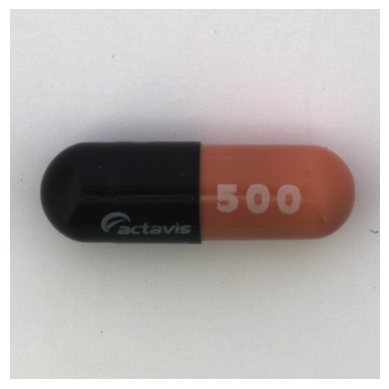

In [11]:
image = mpimg.imread('bottle/train/good/000.png')
image2 = mpimg.imread('capsule/train/good/000.png')
image3 = mpimg.imread('hazelnut/train/good/000.png')
plt.imshow(image)
plt.imshow(image2)
plt.axis('off')  # Optionnel : désactiver les axes
plt.show()

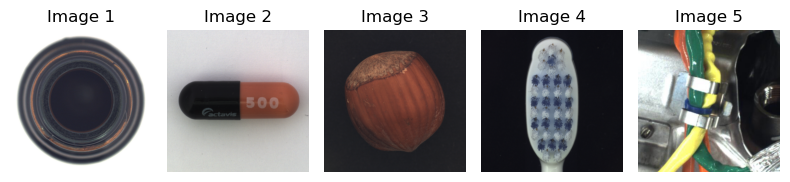

In [18]:
images = [
    mpimg.imread('bottle/train/good/000.png'),
    mpimg.imread('capsule/train/good/000.png'),
    mpimg.imread('hazelnut/train/good/000.png'),
    mpimg.imread('toothbrush/train/good/000.png'),
    mpimg.imread('engine_wiring/train/good/0000.png')
]

plt.figure(figsize=(8, 4))

for i, img in enumerate(images):
    plt.subplot(1, len(images), i + 1)  # 1 ligne, n colonnes, position i+1
    plt.imshow(img)
    plt.title(f"Image {i+1}")
    plt.axis('off')

plt.tight_layout()
plt.show()